# Maestría en Inteligencia Artificial Aplicada

## Curso: Operaciones de aprendizaje automático (TC5044.10)

### Fase 1 | Avance de Proyecto

---

**Institution:** Tecnológico de Monterrey

**Instructores:** Dr. Gerardo Rodríguez Hernández, Mtro. Ricardo Valdez Hernández, Mtra. María Mylen Treviño Elizondo & Dr. José Carlos Soto Monterrybio

**Autores (Equipo 34):** 

|  FULL NAME                      |     STUDENT ID    | 
| :--------------------------:    |:-----------------:|
| Emilio Contreras Téllez         |  A01111353        | 
| Claudio Luis Del Valle Azuara   |  A01795773        | 
| Alejandro Díaz Villagómez       |  A01276769        | 
| Guillermo Herrera Acosta        |  A01400835        | 
| Ivan Troy Santaella Martinez    |  A01120515        | 

**Fecha de entrega:** 12 de octubre del 2025

# 1) SETUP AND CONFIGURATION

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import subprocess

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create directory structure
Path('data').mkdir(exist_ok=True)
Path('outputs/figures').mkdir(parents=True, exist_ok=True)
Path('outputs/transformers').mkdir(parents=True, exist_ok=True)

print("✓ Environment setup complete")

✓ Environment setup complete


# 2) DATA ACQUISITION AND INITIAL INSPECTION

In [40]:
# Load dataset
df_raw = pd.read_csv('data/german_credit_modified.csv')

print(f"Shape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")
print(f"\nData types:\n{df_raw.dtypes.value_counts()}")
print(f"\nFirst 3 rows:")
display(df_raw.head(3))

Shape: 1020 rows × 22 columns

Data types:
object    22
Name: count, dtype: int64

First 3 rows:


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit,mixed_type_col
0,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,...,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,bad
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,...,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,NaN
2,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,...,23.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,unknown


# 3) DATA CLEANING

## 3.1) Column Translation (German → English)

In [41]:
column_mapping = {
    'laufkont': 'checking_account', 'laufzeit': 'duration',
    'moral': 'credit_history', 'verw': 'purpose', 'hoehe': 'amount',
    'sparkont': 'savings_account', 'beszeit': 'employment_duration',
    'rate': 'installment_rate', 'famges': 'personal_status',
    'buerge': 'other_debtors', 'wohnzeit': 'residence_duration',
    'verm': 'property', 'alter': 'age',
    'weitkred': 'other_installment_plans', 'wohn': 'housing',
    'bishkred': 'existing_credits', 'beruf': 'job',
    'pers': 'dependents', 'telef': 'telephone',
    'gastarb': 'foreign_worker', 'kredit': 'credit_risk'
}

df = df_raw.rename(columns=column_mapping)
print("\n[3.1] ✓ Column names translated to English")
print(f"\nFirst 3 rows:")
display(df.head(3))


[3.1] ✓ Column names translated to English

First 3 rows:


,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,personal_status,other_debtors,...,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk,mixed_type_col
0,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,...,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,bad
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,...,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,NaN
2,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,...,23.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,unknown


## 3.2) Missing Values Analysis

In [42]:
missing = df.isnull().sum()
if missing.sum() > 0:
    print(f"\n[3.2] Missing values found:\n\n{missing[missing > 0]}")
else:
    print("\n[3.2] ✓ No missing values detected")


[3.2] Missing values found:

checking_account           15
duration                   10
credit_history             17
purpose                    16
amount                      8
savings_account            12
employment_duration        17
installment_rate            9
personal_status             7
other_debtors              13
residence_duration         15
property                   11
age                        11
other_installment_plans    10
housing                     5
existing_credits           12
job                        12
dependents                  8
telephone                   8
foreign_worker             15
credit_risk                16
mixed_type_col             92
dtype: int64


## 3.3) Target Variable Cleaning

In [43]:
print(f"\n[3.3] Target variable 'credit_risk' before cleaning:")
print(f"\n  Unique values: \n{df['credit_risk'].unique()}")
print(f"\n  Value counts:\n{df['credit_risk'].value_counts(dropna=False)}")

# Clean target
df['credit_risk'] = df['credit_risk'].astype(str).str.strip().str.lower()
invalid_target = df['credit_risk'].isin(['', 'nan', 'none', 'unknown']) | df['credit_risk'].isnull()
rows_before = len(df)
df = df[~invalid_target].copy()
rows_removed = rows_before - len(df)

print(f"\n  → Removed {rows_removed} rows with invalid target")
print(f"\n  → Remaining values: {df['credit_risk'].unique()}")


[3.3] Target variable 'credit_risk' before cleaning:

  Unique values: 
['1.0' '0.0' ' 1.0 ' nan '967.0' '104.0' '123.0' 'invalid' ' 0.0 ' '37.0'
 '341.0' ' NAN ' '86.0' '?' '878.0' '138.0']

  Value counts:
credit_risk
1.0        664
0.0        282
 1.0        25
 0.0        21
NaN         16
 NAN         2
967.0        1
104.0        1
123.0        1
invalid      1
37.0         1
341.0        1
86.0         1
?            1
878.0        1
138.0        1
Name: count, dtype: int64

  → Removed 18 rows with invalid target

  → Remaining values: ['1.0' '0.0' '967.0' '104.0' '123.0' 'invalid' '37.0' '341.0' '86.0' '?'
 '878.0' '138.0']


## 3.4) Data Quality Issues

In [44]:
# Remove problematic column
if 'mixed_type_col' in df.columns:
    df = df.drop(columns=['mixed_type_col'])
    print(f"\n[3.4] ✓ Dropped 'mixed_type_col' (inconsistent types)")

# Strip whitespace from all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Convert numeric columns
numeric_cols = [col for col in df.columns if col != 'credit_risk']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows with missing values after conversion
rows_before = len(df)
df = df.dropna()
rows_removed = rows_before - len(df)
print(f"\n  → Removed {rows_removed} rows with missing values after conversion")

# Remove duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"\n  → Removed {duplicates} duplicate rows")


[3.4] ✓ Dropped 'mixed_type_col' (inconsistent types)

  → Removed 256 rows with missing values after conversion

  → Removed 7 duplicate rows


## 3.5) Cleaning Summary

In [45]:
print(f"Original shape:  {df_raw.shape}")
print(f"\nCleaned shape:   {df.shape}")
print(f"\nRows removed:    {df_raw.shape[0] - df.shape[0]} ({100*(df_raw.shape[0]-df.shape[0])/df_raw.shape[0]:.1f}%)")
print(f"\nFinal target distribution:\n{df['credit_risk'].value_counts()}")


Original shape:  (1020, 22)

Cleaned shape:   (739, 21)

Rows removed:    281 (27.5%)

Final target distribution:
credit_risk
1.0        506
0.0        227
104.0        1
123.0        1
invalid      1
341.0        1
?            1
878.0        1
Name: count, dtype: int64


# 4) DATA VERSIONING v1 - CLEANED DATA

In [46]:
# Save cleaned dataset
cleaned_path = 'data/german_credit_cleaned_v1.csv'
df.to_csv(cleaned_path, index=False)
print(f"✓ Cleaned dataset saved: {cleaned_path}")

# Initialize DVC (if not already initialized)
try:
    subprocess.run(['dvc', 'version'], capture_output=True, check=True)
    print("✓ DVC is installed")
    
    # Add file to DVC
    try:
        subprocess.run(['dvc', 'add', cleaned_path], capture_output=True, check=True)
        print(f"✓ DVC tracking enabled for {cleaned_path}")
        print("  → Run: git add data/german_credit_cleaned_v1.csv.dvc data/.gitignore")
        print("  → Run: git commit -m 'v1: cleaned dataset'")
    except subprocess.CalledProcessError:
        print("⚠ DVC add failed (may already be tracked)")
except FileNotFoundError:
    print("⚠ DVC not installed. Install with: pip install dvc")
    print("  For now, data is saved locally without versioning.")

✓ Cleaned dataset saved: data/german_credit_cleaned_v1.csv
✓ DVC is installed
⚠ DVC add failed (may already be tracked)


# 5) EXPLORATORY DATA ANALYSIS (EDA)

## 5.1) Univariate Analysis - Numerical Variables


[5.1] Univariate Analysis - Numerical Variables


,duration,amount,installment_rate,age,residence_duration,existing_credits
count,739.00,739.00,739.00,739.00,739.00,739.00
mean,25.73,4519.96,3.44,39.06,6.11,4.94
std,59.40,32674.31,7.31,47.81,43.38,36.56
min,4.00,276.00,1.00,19.00,1.00,1.00
25%,12.00,1373.00,2.00,27.00,2.00,1.00
50%,18.00,2333.00,3.00,33.00,3.00,1.00
75%,24.00,3977.50,4.00,42.00,4.00,2.00
max,882.00,887992.00,146.00,825.00,901.00,685.00


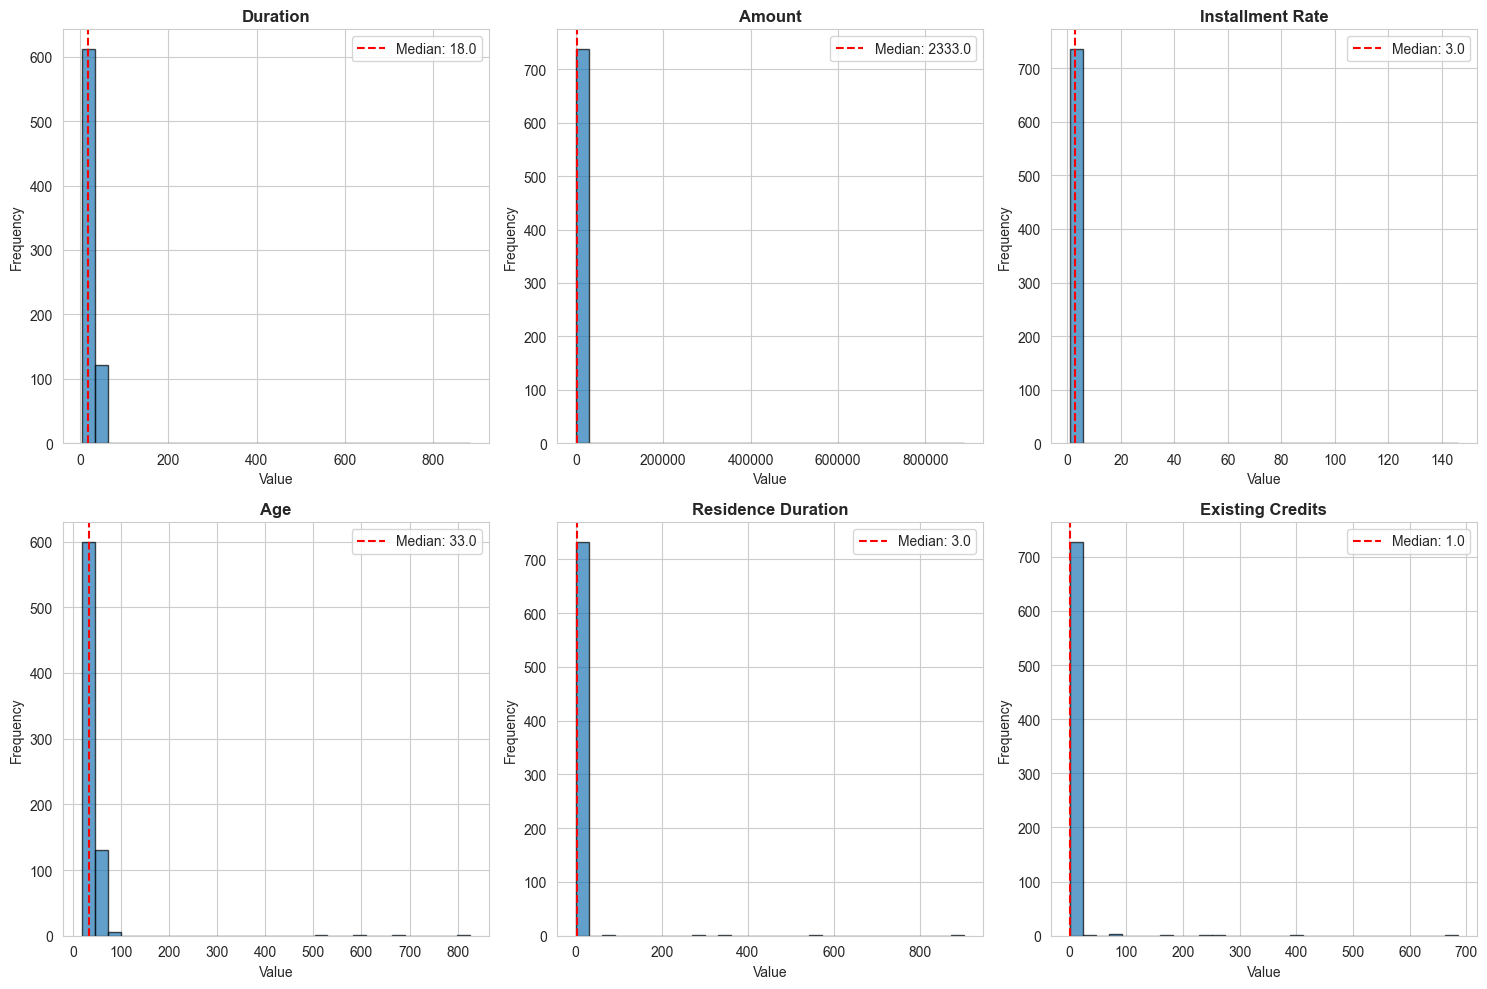

In [47]:
print("\n[5.1] Univariate Analysis - Numerical Variables")

# Key numeric features
numeric_features = ['duration', 'amount', 'installment_rate', 'age', 
                   'residence_duration', 'existing_credits']

# Descriptive statistics
display(df[numeric_features].describe().round(2))

# Visualize distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].median(), color='red', linestyle='--', 
                     label=f'Median: {df[col].median():.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('outputs/figures/01_univariate_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

**Análisis univariado de variables numéricas**

El análisis exploratorio muestra que las variables numéricas presentan distribuciones altamente asimétricas a la derecha, con valores atípicos significativos. En particular, las variables Amount, Age, Residence Duration y Existing Credits exhiben máximos anormalmente altos (por ejemplo, Amount hasta 887,992 y Age hasta 825), lo que sugiere la presencia de errores o registros atípicos. Las medianas, sin embargo, se mantienen en rangos realistas (por ejemplo, Age = 33, Amount = 2,333), indicando que la mayoría de los datos son razonables.

Estos hallazgos evidencian la necesidad de aplicar tratamiento de outliers o winsorización antes de modelar, para evitar sesgos en los resultados.

## 5.2) Target Distribution


[5.2] Target Distribution Analysis

Credit Risk Distribution:
  1.0: 506 (68.5%)
  0.0: 227 (30.7%)
  104.0: 1 (0.1%)
  123.0: 1 (0.1%)
  invalid: 1 (0.1%)
  341.0: 1 (0.1%)
  ?: 1 (0.1%)
  878.0: 1 (0.1%)


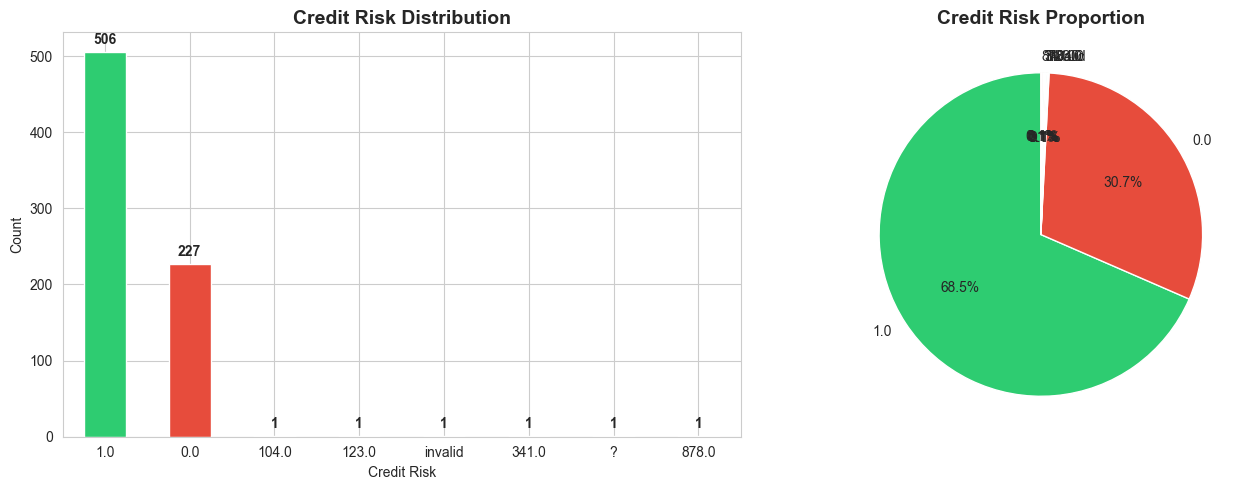

In [48]:
print("\n[5.2] Target Distribution Analysis")

target_counts = df['credit_risk'].value_counts()
target_pct = df['credit_risk'].value_counts(normalize=True) * 100

print(f"\nCredit Risk Distribution:")
for value, count in target_counts.items():
    print(f"  {value}: {count} ({target_pct[value]:.1f}%)")

# Visualize target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Credit Risk Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit Risk')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
           colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Credit Risk Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/figures/02_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5.3) Bivariate Analysis - Numerical vs Target


[5.3] Bivariate Analysis - Numerical Features vs Target


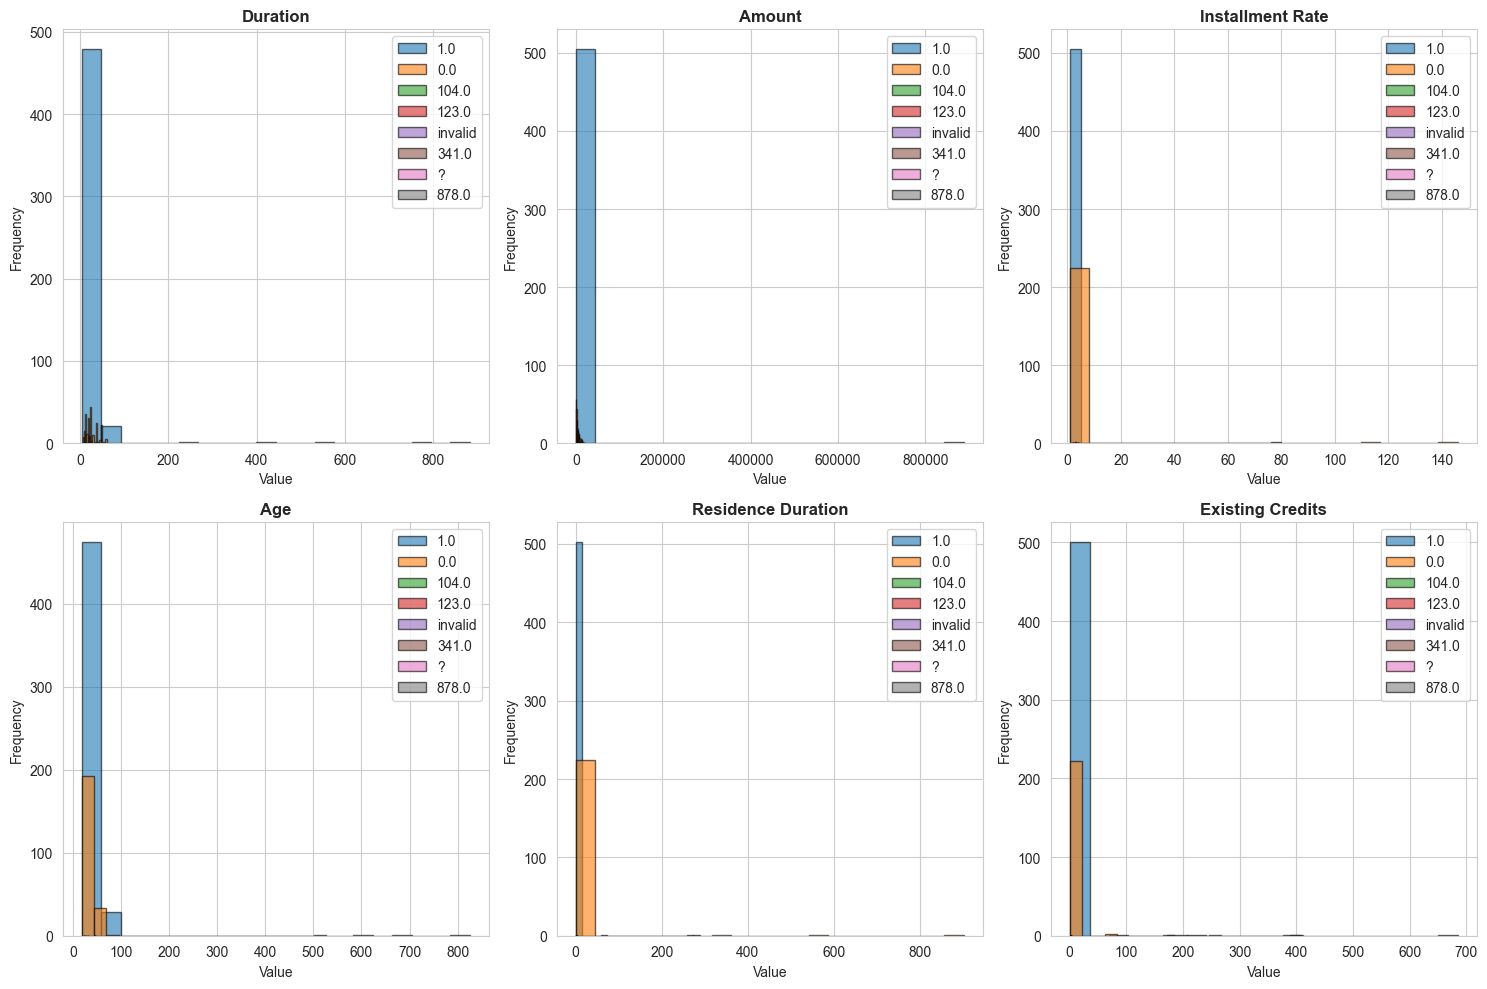


Mean values by credit risk:


,duration,amount,installment_rate,age,residence_duration,existing_credits
credit_risk,,,,,,
0.0,24.82,4030.74,4.25,36.24,10.78,5.79
1.0,26.22,4764.41,3.08,40.40,4.06,4.58
104.0,36.00,5742.00,2.00,31.00,2.00,2.00
123.0,15.00,1316.00,2.00,47.00,2.00,2.00
341.0,12.00,1393.00,4.00,47.00,4.00,3.00
878.0,8.00,1237.00,3.00,24.00,4.00,1.00
?,21.00,2993.00,3.00,28.00,2.00,2.00
invalid,18.00,1800.00,4.00,24.00,2.00,2.00


In [49]:
print("\n[5.3] Bivariate Analysis - Numerical Features vs Target")

# Compare distributions by target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    for risk in df['credit_risk'].unique():
        data = df[df['credit_risk'] == risk][col]
        axes[idx].hist(data, bins=20, alpha=0.6, label=risk, edgecolor='black')
    
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('outputs/figures/03_bivariate_numerical.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
print("\nMean values by credit risk:")
comparison = df.groupby('credit_risk')[numeric_features].mean().round(2)
display(comparison)

## 5.4) Multivariate Analysis - Correlation Matrix


[5.4] Correlation Analysis


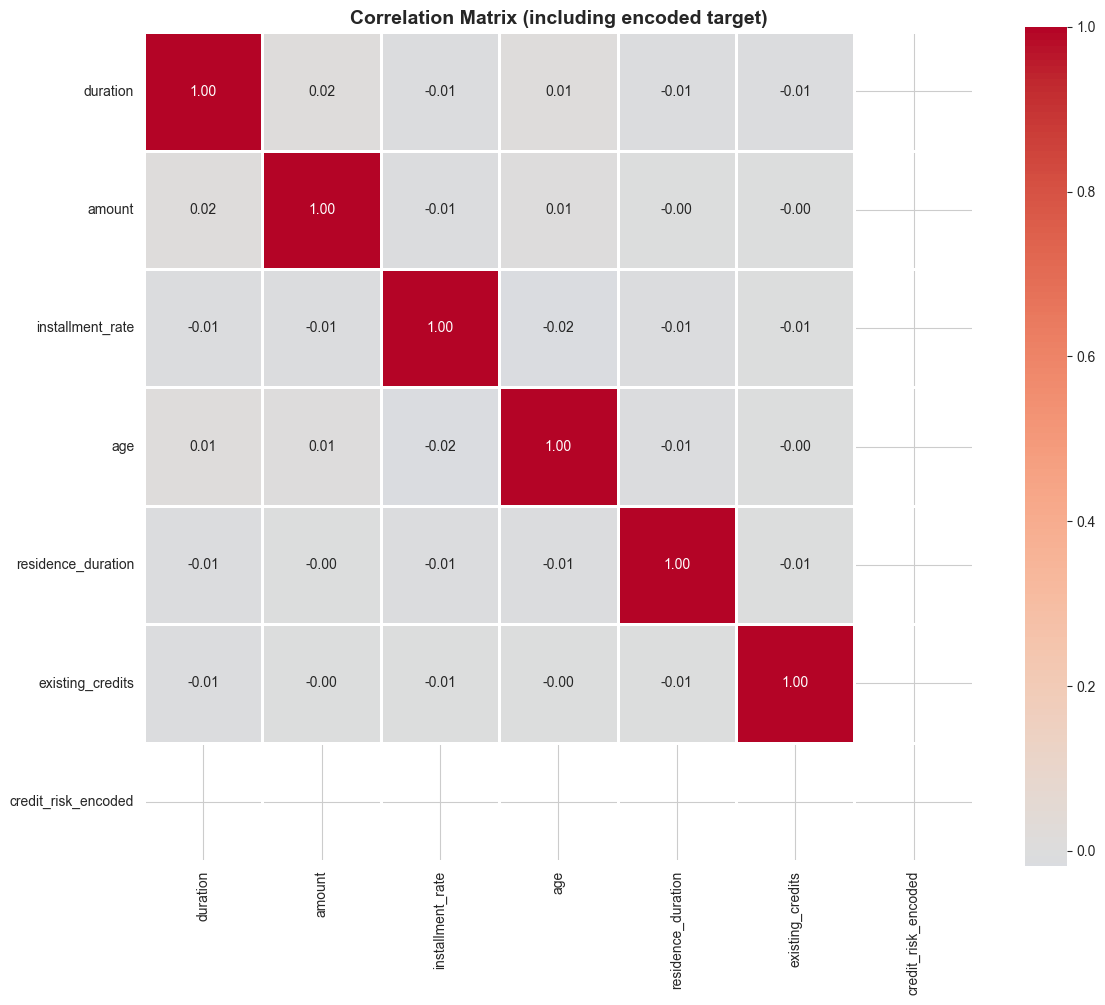


Top 5 features correlated with credit_risk:


duration             NaN
amount               NaN
installment_rate     NaN
age                  NaN
residence_duration   NaN
Name: credit_risk_encoded, dtype: float64

In [50]:
print("\n[5.4] Correlation Analysis")

# Encode target for correlation
df_corr = df.copy()
df_corr['credit_risk_encoded'] = (df_corr['credit_risk'] == 'good').astype(int)

# Correlation matrix
corr_features = numeric_features + ['credit_risk_encoded']
corr_matrix = df_corr[corr_features].corr()

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=1)
plt.title('Correlation Matrix (including encoded target)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/figures/04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 features correlated with credit_risk:")
target_corr = corr_matrix['credit_risk_encoded'].drop('credit_risk_encoded').abs().sort_values(ascending=False)
display(target_corr.head())

## 5.5) Outlier Detection


[5.5] Outlier Detection (IQR Method)


,Feature,Outliers,Percentage,Lower_Bound,Upper_Bound
0,duration,60,8.1%,-6.0,42.0
1,amount,57,7.7%,-2533.8,7884.2
2,installment_rate,3,0.4%,-1.0,7.0
3,age,21,2.8%,4.5,64.5
4,residence_duration,6,0.8%,-1.0,7.0
5,existing_credits,15,2.0%,-0.5,3.5


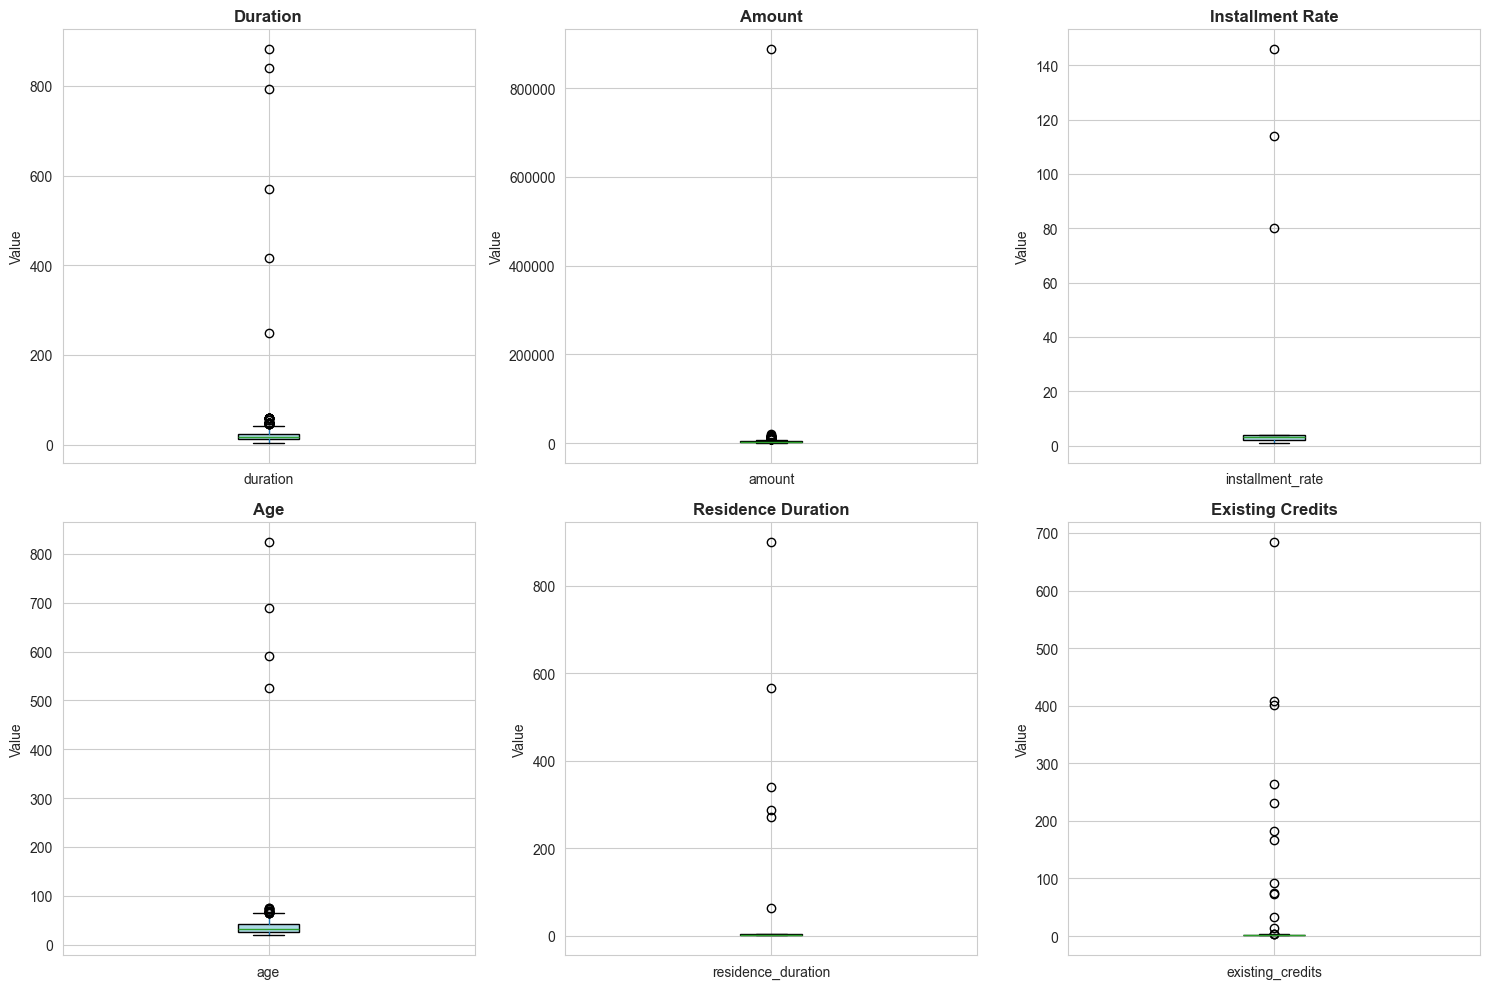

In [51]:
print("\n[5.5] Outlier Detection (IQR Method)")

outlier_summary = []
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_pct = 100 * outliers / len(df)
    
    outlier_summary.append({
        'Feature': col,
        'Outliers': outliers,
        'Percentage': f"{outlier_pct:.1f}%",
        'Lower_Bound': f"{lower:.1f}",
        'Upper_Bound': f"{upper:.1f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# Visualize with boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    df.boxplot(column=col, ax=axes[idx], patch_artist=True,
              boxprops=dict(facecolor='lightblue'))
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.savefig('outputs/figures/05_outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

## 6) DATA PREPROCESSING

In [52]:
# Create copy for preprocessing
df_processed = df.copy()

## 6.1) Outlier Treatment

In [53]:
print("\n[6.1] Outlier Treatment\n")

# Cap outliers at 99th percentile for key features
outlier_cols = ['amount', 'duration']
for col in outlier_cols:
    cap_value = df_processed[col].quantile(0.99)
    n_capped = (df_processed[col] > cap_value).sum()
    df_processed[col] = df_processed[col].clip(upper=cap_value)
    print(f"  {col}: capped {n_capped} values at {cap_value:.0f}")


[6.1] Outlier Treatment

  amount: capped 8 values at 14504
  duration: capped 6 values at 60


## 6.2) Categorical Encoding

In [54]:
print("\n[6.2] Categorical Encoding")

# Separate features and target
X = df_processed.drop('credit_risk', axis=1)
y = df_processed['credit_risk']

# All features are currently numeric (already encoded in original data)
# But we encode target to binary
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # good=1, bad=0 (or vice versa)
print(f"\n  Target encoded: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Save label encoder
import pickle
with open('outputs/transformers/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
print("  ✓ Label encoder saved")


[6.2] Categorical Encoding

  Target encoded: {'0.0': np.int64(0), '1.0': np.int64(1), '104.0': np.int64(2), '123.0': np.int64(3), '341.0': np.int64(4), '878.0': np.int64(5), '?': np.int64(6), 'invalid': np.int64(7)}
  ✓ Label encoder saved


## 6.3) Numerical Scaling

In [55]:
print("\n[6.3] Numerical Scaling (StandardScaler)")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n  ✓ Scaled {X.shape[1]} features")
print(f"  Sample means after scaling: {X_scaled.mean().round(3).head().to_dict()}")
print(f"  Sample stds after scaling:  {X_scaled.std().round(3).head().to_dict()}")

# Save scaler
with open('outputs/transformers/standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("  ✓ Scaler saved")


[6.3] Numerical Scaling (StandardScaler)

  ✓ Scaled 20 features
  Sample means after scaling: {'checking_account': 0.0, 'duration': 0.0, 'credit_history': 0.0, 'purpose': 0.0, 'amount': -0.0}
  Sample stds after scaling:  {'checking_account': 1.001, 'duration': 1.001, 'credit_history': 1.001, 'purpose': 1.001, 'amount': 1.001}
  ✓ Scaler saved


## 6.4) Feature Engineering

In [ ]:
print("\n[6.4] Feature Engineering")

# Create new features
X_scaled['amount_per_month'] = df_processed['amount'] / df_processed['duration']
X_scaled['age_at_end'] = df_processed['age'] + (df_processed['duration'] / 12)
X_scaled['debt_burden'] = df_processed['installment_rate'] * df_processed['duration']

engineered_features = ['amount_per_month', 'age_at_end', 'debt_burden']
print(f"\n  Created {len(engineered_features)} new features:")
for feat in engineered_features:
    print(f"    - {feat}")

# Scale new features
scaler_new = StandardScaler()
X_scaled[engineered_features] = scaler_new.fit_transform(X_scaled[engineered_features])



[6.4] Feature Engineering
  Created 3 new features:
    - amount_per_month
    - age_at_end
    - debt_burden


## 6.5) Train/Test Split

In [ ]:
print("\n[6.5] Train/Test Split")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n  Training set:   {X_train.shape[0]} samples ({100*len(X_train)/len(X_scaled):.0f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({100*len(X_test)/len(X_scaled):.0f}%)")
print(f"  Features:       {X_train.shape[1]}")
print(f"\n  Target distribution in train:")
print(f"    Class 0: {(y_train == 0).sum()} ({100*(y_train == 0).sum()/len(y_train):.1f}%)")
print(f"    Class 1: {(y_train == 1).sum()} ({100*(y_train == 1).sum()/len(y_train):.1f}%)")

# Save splits
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
pd.Series(y_train).to_csv('data/y_train.csv', index=False, header=['credit_risk'])
pd.Series(y_test).to_csv('data/y_test.csv', index=False, header=['credit_risk'])
print("\n  ✓ Train/test splits saved to data/")

# 7) DATA VERSIONING v2 - PROCESSED DATA

In [ ]:
# Save fully processed dataset
processed_df = X_scaled.copy()
processed_df['credit_risk'] = y_encoded
processed_path = 'data/german_credit_processed_v2.csv'
processed_df.to_csv(processed_path, index=False)
print(f"✓ Processed dataset saved: {processed_path}")

# Add to DVC
try:
    subprocess.run(['dvc', 'add', processed_path], capture_output=True, check=True)
    print(f"✓ DVC tracking enabled for {processed_path}")
    print("  → Run: git add data/german_credit_processed_v2.csv.dvc")
    print("  → Run: git commit -m 'v2: preprocessed dataset ready for modeling'")
except:
    print("⚠ DVC add skipped (not installed or already tracked)")